<h1>Assignment 1 - Question 1</h1>

In [277]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import multivariate_normal
from sklearn.metrics import roc_curve
from scipy import linalg

In [278]:
np.random.seed(1)

<img src="/Users/pradnyeshchoudhari/EECE 5644 - LOCAL/Assignments/Assignment 01/Images/1.png">


In [279]:
mean0 = np.array([-1, -1, -1, -1])
covariance0 = np.array(
    [[2, -0.5, 0.3, 0], [-0.5, 1, -0.5, 0], [0.3, -0.5, 1, 0], [0, 0, 0, 2]]
)
p_class_0 = 0.35

mean1 = np.array([1, 1, 1, 1])
covariance1 = np.array(
    [[1, 0.3, -0.2, 0], [0.3, 2, 0.3, 0], [-0.2, 0.3, 1, 0], [0, 0, 0, 3]]
)
p_class_1 = 0.65

number_of_samples = 10000
num_samples_class0 = int(p_class_0 * number_of_samples)
num_samples_class1 = int(p_class_1 * number_of_samples)


samples_class0 = np.random.multivariate_normal(mean0, covariance0, num_samples_class0)
samples_class1 = np.random.multivariate_normal(mean1, covariance1, num_samples_class1)

labels_class0 = np.zeros(num_samples_class0)
labels_class1 = np.ones(num_samples_class1)

samples = np.vstack((samples_class0, samples_class1))
labels = np.hstack((labels_class0, labels_class1))

In [280]:
df = pd.DataFrame(samples, columns=["x1", "x2", "x3", "x4"])
df["Label"] = labels

df.to_csv("data_created_for_hw1_q1_10000_samples.csv", index=False)

In [281]:
df

,x1,x2,x3,x4,Label
0,-2.885759,-0.199077,-2.716423,-1.865154,0.0
1,-3.172325,-1.774531,-0.538224,-4.254867,0.0
2,-2.410798,-2.655004,-1.048926,-1.352663,0.0
3,-1.317274,-2.400534,-0.514371,-1.543135,0.0
4,-0.753927,-0.834060,-0.614293,-2.241479,0.0
...,...,...,...,...,...
9995,1.981959,1.710207,2.784061,-0.120244,1.0
9996,2.029219,0.746992,0.546795,1.572723,1.0
9997,1.648817,2.504954,1.105592,0.246232,1.0
9998,0.148452,1.171763,2.323189,2.404018,1.0


<img src="/Users/pradnyeshchoudhari/EECE 5644 - LOCAL/Assignments/Assignment 01/Images/1A.png">


<h3> Part A - 1 </h3>

Reference from 2.2.1 Pattern Classification by Duda, Hart and Stork.

$ Considering \space \lambda\_{ij} \space loss $

$$ R(L_0|X) = \lambda_{00} P(L_0|X) + \lambda_{01} P(L_1|X) $$
$$ R(L_1|X) = \lambda_{10} P(L_0|X) + \lambda_{11} P(L_1|X) $$

The fundamental rule is to decide $L_0$ if $R(\alpha_0|X) < R(\alpha_1|X)$, in terms of the posterior probabilities, we decide $L_0$ if

$$ (\lambda_{10} - \lambda_{00}) P(L*0|X) > (\lambda_{01} - \lambda_{11}) P(L_1|X) $$

Using Bayes Theorem we get, in general

$$ \frac{P(X|L_0)}{P(X|L_1)} ? \frac{(\lambda_{01} - \lambda_{11}).P(L_0)}{(\lambda_{10} - \lambda_{00}).P(L_1)} $$

Given $P(L_0) = 0.35 \space \& \space P(L_1) = 0.65 $

$$ \frac{P(X|L_1)}{P(X|L_0)} ? \frac{(\lambda_{10} - \lambda_{00}).0.35} {(\lambda_{01} - \lambda_{11}).0.65} $$
$$ \frac{P(X|L_1)}{P(X|L_0)}.{1.8571} ? \frac{(\lambda_{10} - \lambda_{00})} {(\lambda_{01} - \lambda_{11})} $$


<h3> Part A - 2 </h3> 

In [282]:
px_given_l0 = multivariate_normal.pdf(samples, mean=mean0, cov=covariance0)
px_given_l1 = multivariate_normal.pdf(samples, mean=mean1, cov=covariance1)
likelihood_ratio = px_given_l1 / px_given_l0

In [283]:
fpr_list_likelihood, tpr_list_likelihood, gammas = roc_curve(labels, likelihood_ratio)

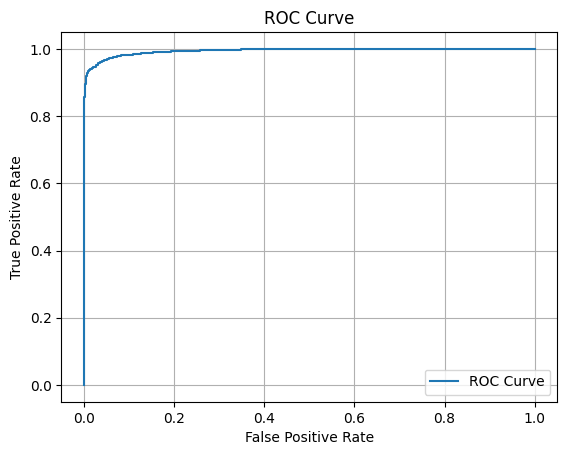

In [284]:
plt.figure()
plt.plot(fpr_list_likelihood, tpr_list_likelihood, label="ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

<h3> Part A - 3 </h3>


In [285]:
perror_likelihood = (
    fpr_list_likelihood * p_class_0 + (1 - tpr_list_likelihood) * p_class_1
)

In [286]:
gamma_theoretical = p_class_0 / p_class_1

decisions_theoretical = (likelihood_ratio >= gamma_theoretical).astype(int)

tp = np.sum((decisions_theoretical == 1) & (labels == 1))
fp = np.sum((decisions_theoretical == 1) & (labels == 0))
fn = np.sum((decisions_theoretical == 0) & (labels == 1))
tn = np.sum((decisions_theoretical == 0) & (labels == 0))

tpr_theoretical = tp / (tp + fn) if (tp + fn) > 0 else 0
fpr_theoretical = fp / (fp + tn) if (fp + tn) > 0 else 0

p_error_theoretical = fpr_theoretical * p_class_0 + (1 - tpr_theoretical) * p_class_1

In [287]:
df_taus_tpr_fpr_likelihood = pd.DataFrame(gammas, columns=["Gamma"])
df_taus_tpr_fpr_likelihood["fpr"] = fpr_list_likelihood
df_taus_tpr_fpr_likelihood["tpr"] = tpr_list_likelihood
df_taus_tpr_fpr_likelihood["perror"] = perror_likelihood
df_taus_tpr_fpr_likelihood["perror - therotical"] = p_error_theoretical

In [288]:
df_likelihood_result = df_taus_tpr_fpr_likelihood[
    df_taus_tpr_fpr_likelihood["perror"] == df_taus_tpr_fpr_likelihood["perror"].min()
].reset_index()
df_likelihood_result

,index,Gamma,fpr,tpr,perror,perror - therotical
0,234,0.484447,0.047429,0.968154,0.0373,0.0376


In [289]:
gamma_min_likelihood = df_likelihood_result.loc[0]["Gamma"]
fpr_min_likelihood = df_likelihood_result.loc[0]["fpr"]
tpr_min_likelihood = df_likelihood_result.loc[0]["tpr"]
perror_min_likelihood = df_likelihood_result.loc[0]["perror"]

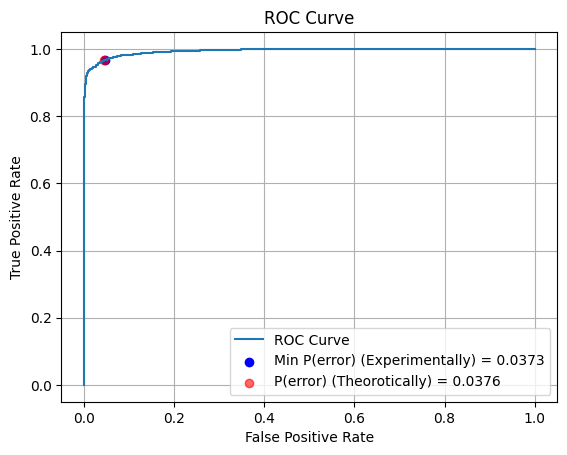

In [290]:
plt.figure()
plt.plot(fpr_list_likelihood, tpr_list_likelihood, label="ROC Curve")
plt.scatter(
    fpr_min_likelihood,
    tpr_min_likelihood,
    color="Blue",
    label=f"Min P(error) (Experimentally) = {perror_min_likelihood:.4f}",
)
plt.scatter(
    fpr_theoretical,
    tpr_theoretical,
    color="red",
    label=f"P(error) (Theorotically) = {p_error_theoretical:.4f}",
    alpha=0.6
)
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

In [291]:
print(f"Therotically Derived Gamma: {gamma_theoretical:.4f}")
print(f"Experimentally Derived Gamma: {gamma_min_likelihood:.4f}")
print(f"Delta: {abs(gamma_min_likelihood - gamma_theoretical):.4f}")

print(f"Therotically Derived PError: {p_error_theoretical:.4f}")
print(f"Experimentally Derived PError: {perror_min_likelihood:.4f}")
print(f"Delta: {abs(perror_min_likelihood - p_error_theoretical):.4f}")


Therotically Derived Gamma: 0.5385
Experimentally Derived Gamma: 0.4844
Delta: 0.0540
Therotically Derived PError: 0.0376
Experimentally Derived PError: 0.0373
Delta: 0.0003


<img src="/Users/pradnyeshchoudhari/EECE 5644 - LOCAL/Assignments/Assignment 01/Images/1B.png">


In [292]:
mean0 = np.array([-1, -1, -1, -1])
covariance0_naive = np.array([[2, 0, 0, 0], [0, 1, 0, 0], [0, 0, 1, 0], [0, 0, 0, 2]])

mean1 = np.array([1, 1, 1, 1])
covariance1_naive = np.array([[1, 0, 0, 0], [0, 2, 0, 0], [0, 0, 1, 0], [0, 0, 0, 3]])

In [293]:
px_given_l0_naive = multivariate_normal.pdf(samples, mean=mean0, cov=covariance0_naive)
px_given_l1_naive = multivariate_normal.pdf(samples, mean=mean1, cov=covariance1_naive)
likelihood_ratio_naive = px_given_l1_naive / px_given_l0_naive

In [294]:
fpr_list_naive, tpr_list_naive, gammas = roc_curve(labels, likelihood_ratio_naive)

In [295]:
perror_list_naive = fpr_list_naive * p_class_0 + (1 - tpr_list_naive) * p_class_1

In [296]:
df_likelihood_naive = pd.DataFrame(gammas, columns=["Gamma"])
df_likelihood_naive["fpr"] = fpr_list_naive
df_likelihood_naive["tpr"] = tpr_list_naive
df_likelihood_naive["perror"] = perror_list_naive
df_likelihood_naive["perror - therotical"] = p_error_theoretical

In [297]:
df_likelihood_ratio_naive_result = df_likelihood_naive[
    df_likelihood_naive["perror"] == df_likelihood_naive["perror"].min()
].reset_index()
df_likelihood_ratio_naive_result

,index,Gamma,fpr,tpr,perror,perror - therotical
0,286,0.504565,0.052857,0.960769,0.044,0.0376


In [298]:
gamma_min_likelihood_naive = df_likelihood_ratio_naive_result.loc[0]["Gamma"]
fpr_min_likelihood_naive = df_likelihood_ratio_naive_result.loc[0]["fpr"]
tpr_min_likelihood_naive = df_likelihood_ratio_naive_result.loc[0]["tpr"]
perror_min_likelihood_naive = df_likelihood_ratio_naive_result.loc[0]["perror"]

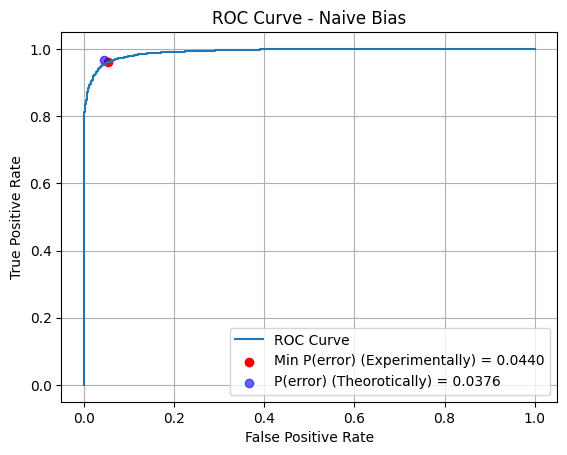

In [299]:
plt.figure()
plt.plot(fpr_list_naive, tpr_list_naive, label="ROC Curve")
plt.scatter(
    [fpr_min_likelihood_naive],
    [tpr_min_likelihood_naive],
    color="red",
    label=f"Min P(error) (Experimentally) = {perror_min_likelihood_naive:.4f}",
)
plt.scatter(
    fpr_theoretical,
    tpr_theoretical,
    color="blue",
    label=f"P(error) (Theorotically) = {p_error_theoretical:.4f}",
    alpha=0.6
)
plt.plot([0, 0], [1, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Naive Bias")
plt.legend()
plt.grid(True)
plt.show()

In [300]:
gamma_therotically_cal = p_class_0 / p_class_1
print(f"Therotically Derived Gamma: {gamma_therotically_cal:.4f}")
print(f"Experimentally Derived Gamma: {gamma_min_likelihood_naive:.4f}")
print(f"Delta: {abs(gamma_min_likelihood_naive - gamma_therotically_cal):.4f}")

print(f"Therotically Derived PError: {p_error_theoretical:.4f}")
print(f"Experimentally Derived PError: {perror_min_likelihood_naive:.4f}")
print(f"Delta: {abs(perror_min_likelihood - perror_min_likelihood_naive):.4f}")

Therotically Derived Gamma: 0.5385
Experimentally Derived Gamma: 0.5046
Delta: 0.0339
Therotically Derived PError: 0.0376
Experimentally Derived PError: 0.0440
Delta: 0.0067


<img src="/Users/pradnyeshchoudhari/EECE 5644 - LOCAL/Assignments/Assignment 01/Images/1C.png">


In [301]:
def perform_lda(X, y):
    classes = np.unique(y)
    n_classes = len(classes)
    n_components = n_classes - 1

    mean_overall = np.mean(X, axis=0)

    means = []
    for cls in classes:
        means.append(np.mean(X[y == cls], axis=0))
    means = np.array(means)

    Sw = np.zeros((X.shape[1], X.shape[1]))
    for cls, mean in zip(classes, means):
        class_scatter = np.cov(X[y == cls].T)
        Sw += class_scatter * (np.sum(y == cls) - 1)

    Sb = np.zeros((X.shape[1], X.shape[1]))
    for cls, mean in zip(classes, means):
        n = np.sum(y == cls)
        mean_diff = (mean - mean_overall).reshape(-1, 1)
        Sb += n * (mean_diff @ mean_diff.T)

    evals, evecs = linalg.eigh(Sb, Sw)

    indices = np.argsort(evals)[::-1]
    evecs = evecs[:, indices]
    evals = evals[indices]

    w = evecs[:, :n_components]

    y_new = X @ w

    return w, y_new

In [302]:
w, y = perform_lda(samples, labels)

In [303]:
fpr, tpr, thresholds = roc_curve(labels, y)

In [304]:
perror = fpr * p_class_0 + (1 - tpr) * p_class_1

In [305]:
df_lda = pd.DataFrame(thresholds, columns=["Taus"])
df_lda["fpr"] = fpr
df_lda["tpr"] = tpr
df_lda["perror"] = perror
df_lda["perror - therotical"] = p_error_theoretical

In [306]:
df_lda_result = df_lda[df_lda["perror"] == df_lda["perror"].min()].reset_index()

In [307]:
df_lda_result

,index,Taus,fpr,tpr,perror,perror - therotical
0,304,-0.001791,0.053429,0.961692,0.0436,0.0376


In [308]:
tau_min_lda = df_lda_result.loc[0]["Taus"]
fpr_min_lda = df_lda_result.loc[0]["fpr"]
tpr_min_lda = df_lda_result.loc[0]["tpr"]
perror_min_lda = df_lda_result.loc[0]["perror"]

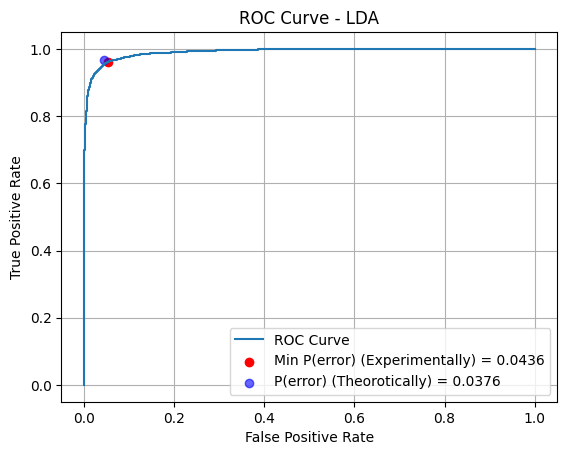

In [309]:
plt.figure()
plt.plot(fpr, tpr, label="ROC Curve")
plt.scatter(
    [fpr_min_lda],
    [tpr_min_lda],
    color="red",
    label=f"Min P(error) (Experimentally) = {perror_min_lda:.4f}",
)
plt.scatter(
    fpr_theoretical,
    tpr_theoretical,
    color="blue",
    label=f"P(error) (Theorotically) = {p_error_theoretical:.4f}",
    alpha=0.6
)
plt.plot([0, 0], [1, 1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - LDA")
plt.legend()
plt.grid(True)
plt.show()

In [310]:
print(f"Therotically Derived PError: {p_error_theoretical:.4f}")
print(f"Experimentally Derived PError: {perror_min_lda:.4f}")
print(f"Delta: {abs(perror_min_likelihood - perror_min_lda):.4f}")

Therotically Derived PError: 0.0376
Experimentally Derived PError: 0.0436
Delta: 0.0063


In [311]:
df_likelihood_result

,index,Gamma,fpr,tpr,perror,perror - therotical
0,234,0.484447,0.047429,0.968154,0.0373,0.0376


In [312]:
df_likelihood_ratio_naive_result

,index,Gamma,fpr,tpr,perror,perror - therotical
0,286,0.504565,0.052857,0.960769,0.044,0.0376


In [313]:
df_lda_result

,index,Taus,fpr,tpr,perror,perror - therotical
0,304,-0.001791,0.053429,0.961692,0.0436,0.0376


This question we did the classification of data from a mixture of two Gaussian distributions using various methods.

Likelihood Ratio Test

The theoretical and experimental minimum probability of error were closely matched (0.0376 and 0.0373 respectively).
The ROC curve showed good separation between classes, indicating effective classification.

Naive Bayes Classifier

This approach yielded a slightly higher error rate (0.0440) compared to the likelihood ratio test.
The performance loss is likely due to the naive assumption of feature independence.

Linear Discriminant Analysis (LDA)

LDA performed slightly worse than the likelihood ratio test but better than Naive Bayes, with an error rate of 0.0436.

In conclusion, the likelihood ratio test performed best for this two-class Gaussian mixture, followed closely by LDA and then Naive Bayes. The close performance of these methods suggests that the data is well-suited for Gaussian-based classification techniques.